In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
class golden():
    """It is the implementation of golden section search technique."""

    def __init__(self,func,lower,upper,tol=1e-5):

        self.lower = lower
        self.upper = upper

        self.tol = tol

        self._ratio = (5**(1/2)-1)/2

        self._iterate(func)

    def _iterate(self,func):

        lower,upper = self.lower,self.upper

        x1 = (1-self.ratio)*upper+self.ratio*lower
        x2 = (1-self.ratio)*lower+self.ratio*upper

        f1 = func(x1)
        f2 = func(x2)

        self.calls = 2

        while (upper-lower)>self.tol:

            if f1>f2:
                lower = x1
                x1 = x2
                f1 = f2
                x2 = (1-self.ratio)*lower+self.ratio*upper
                f2 = func(x2)
            else:
                upper = x2
                x2 = x1
                f2 = f1
                x1 = (1-self.ratio)*upper+self.ratio*lower
                f1 = func(x1)

            self.calls += 1

        self.solution = (lower+upper)/2

        self.minima = func(self.solution)

    @property
    def ratio(self):

        return self._ratio

12 0.7050983124842272 0.07112152096239938


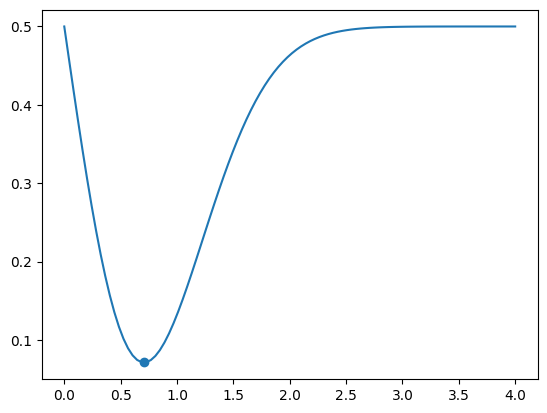

In [3]:
import matplotlib.pyplot as plt

import numpy as np

# def objective(x):
#     return (x-2)**2+2

def objective(x):
    return 0.5-x*np.exp(-x**2)

def objective1(x):
    return (x-2)**2+2

def objective2(x):
    F = 10+0.2*x**(2.3)
    G = 10+80*np.exp(-0.3*x)
    return F+G

def objective3(x):
    return x*(x-2)*(x-3)*(x-6)+15

def objective4(x):
    return (x**2)/(1-x)

x = np.linspace(0,4,100)

o = objective(x)

gs = golden(objective,0,4,tol=4e-2)

print(gs.calls,gs.solution,gs.minima)

plt.plot(x,o)
plt.scatter(gs.solution,gs.minima)
plt.show()

# xL = -3
# xU = 3

# gs = golden(objective1,(xL,xU),ratio=0.51,nitermax=10000,tol=1e-5)

# x = np.linspace(xL,xU,200)

# plt.plot(x,objective1(x))
# plt.scatter(gs.minsol,gs.minval)

# plt.xlabel('x-axis')
# plt.ylabel('objective function')

# plt.show()